# Diferenciación numérica

Puede dar la noción de que realizar derivadas numéricas no tiene tanto sentido si se pueden determinar (en gran parte de los casos) de manera analítica. Sin embargo, suele ser útil esta visión como complemento de otros métodos numéricos que se irán viendo más adelante. Sin embargo la implementación de las derivadas numéricas es sumamente simple como se verá a continuación.

## Contexto matemático: Series de Taylor.

Sea una función $f:\mathbb{R}\to\mathbb{R}$ diferenciable y por lo tanto continua en un punto $a\in\mathbb{R}$, la serie de Taylor esta dada por:

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \ldots 
$$

Que concretamente se lee de manera compacta de la siguiente manera:

$$
f(x) = \sum_{n=0}^{\infty}\frac{f^{(n)}(a)}{n!}(x-a)^n
$$

Como es imposible generar los infinitos términos de la Serie de Taylor, existe una forma de truncar la serie y sumarle la función residuo.

$$
f(x) = f(a) + f'(a)(x-a)+ \frac{f''(a)}{2!} (x-a)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(x-a)^k + R_{k}(x)
$$

En este caso la serie se trunca en $k$ y se genera un residuo que en concreto tiene la siguiente forma

$$
R_k(x)=\frac{f^{(k+1)}(c)}{(k+1)!}(x-a)^{k+1}
$$

donde $c\in(x,a)$. Si $f(x)$ no tuviera esta función residuo entonces solo tendríamos una aproximación a la función real. El papel de la función residuo es determinar correctamente el error de truncamiento de la serie. El [Teorema de Taylor](https://es.wikipedia.org/wiki/Teorema_de_Taylor) garantiza la existencia de esta $c$ para que el residuo sea adecuado, pero no habla de como determinarla y en esencia no es nada trivial pues para cada $x\in\mathbb{R}$ se tendrá un $c$ particular para la que se cumpla el teorema. Por tanto $c$ no es única (aunque tampoco arbitraria) y dependerá de $f$ y de cada $x$. Y al final ni será necesario determinar dicha $c$ solamente hacer una partición suficientemente fina.

Si realizamos el límite para cuando $x\to a$ se tiene, esto es importante para un conveniente cambio de variable que haremos a continuación.

$$
\lim_{x\to a}R_k(x) = \lim_{x\to a}\frac{f^{(k+1)}(c)}{(k+1)!}(x-a)^{k+1} =0
$$

### Cambio de variable

Realizamos $x-a=h\to x = a+h$, entonces aplicando sobre Serie de taylor nos queda:

$$
f(a+h) = f(a) + f'(a)(h)+ \frac{f''(a)}{2!} (h)^2 + \ldots + \frac{f^{(k)}(a)}{k!}(h)^k + R_{k}(a+h)
$$

de forma tal que el límite del residuo para $h\to 0$ es

$$
\lim_{h \to 0} R_k(a+h) = \lim_{h\to 0}\frac{f^{(k+1)}(c)}{(k+1)!}(h)^{k+1} = 0
$$



## La primera derivada

La serie de taylor para $k=1$ es la siguiente

$$
f(a+h)=f(a)+f'(a)(h)+R_1(a+h)
$$

despreciando el residuo tenemos la siguiente aproximación

<span style="color:blue">
\begin{align}
f(a+h)&\approx f(a) + f'(a)(h)\\
f'(a)&\approx \frac{f(a+h)-f(a)}{h}
\end{align}
</span>



y partiendo del hecho de que $\lim_{h\to 0}R_1(a+h)=0$ sabemos que entre más chica sea $h$ mejor será nuestra aproximación. A esta forma de la derivada se le conoce como **forward difference**, ya que se ejecuta tendiendo hacia $a$ positivamente. 

La llamada derivada **backward differences** aplica la misma lógica que la *forward* solo que haciendo la aproximación en sentido negativo hacia el punto $a$. Para ello se considera la serie de taylor

$$
f(a-h) = f(a) + f'(a)(-h) + R_{1}(a-h)
$$

haciendo negativa a $h$. Realizando los arreglos necesarios la aproximación queda de la siguiente manera:

<span style="color:blue">
$$
f'(a) \approx \frac{f(a)-f(a-h)}{h} 
$$
</span>

Por último tenemos la **derivada central** que el producto de expandir $f(a+h)$ y $f(a-h)$ en serie de taylor de orden 2:

$$
f(a+h) = f(a) + f'(a) h + \frac{f''(a)}{2!} h^2 + R_2 (a+h)
$$

y

$$
\begin{split}
f(a-h) &= f(a) + f'(a)(- h) + \frac{f''(a)}{2!} (-h)^2 + R_2 (a-h) \\
&= f(a) - f'(a)h + \frac{f''(a)}{2!} h^2 + R_2 (a-h)
\end{split}
$$

Operando con la misma lógica que en los casos anteriores se llega a la siguiente aproximación

<span style="color:blue">
$$
f'(a)  \approx \frac{f(a+h) - f(a-h)}{2h}
$$
</span>

Mientras que el término despreciado cumple

$$
\lim_{h \to 0} \frac{R_2(a+h) - R_2(a-h)}{2h} = 0
$$

### La implementación

Antes de implementar, nota cuidadosamente que hemos estado sacando las aproximaciones de forma "discreta" es decir, la derivada evaluada en el punto $a$. Aplicando las aproximaciones de las derivadas sobre un conjunto (lista o arreglo) de puntos nos generará el conjunto de puntos que son derivada de una función $f$ cualquiera. 

Implementarlo es en realidad es muy simple, veamos algunos usos prácticos de ello.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def dFor(f,a,h):
    return (f(a+h)-f(a))/h

def dBack(f,a,h):
    return (f(a)-f(a-h))/h

def dCen(f,a,h):
    return (f(a+h)-f(a-h))/(2*h)

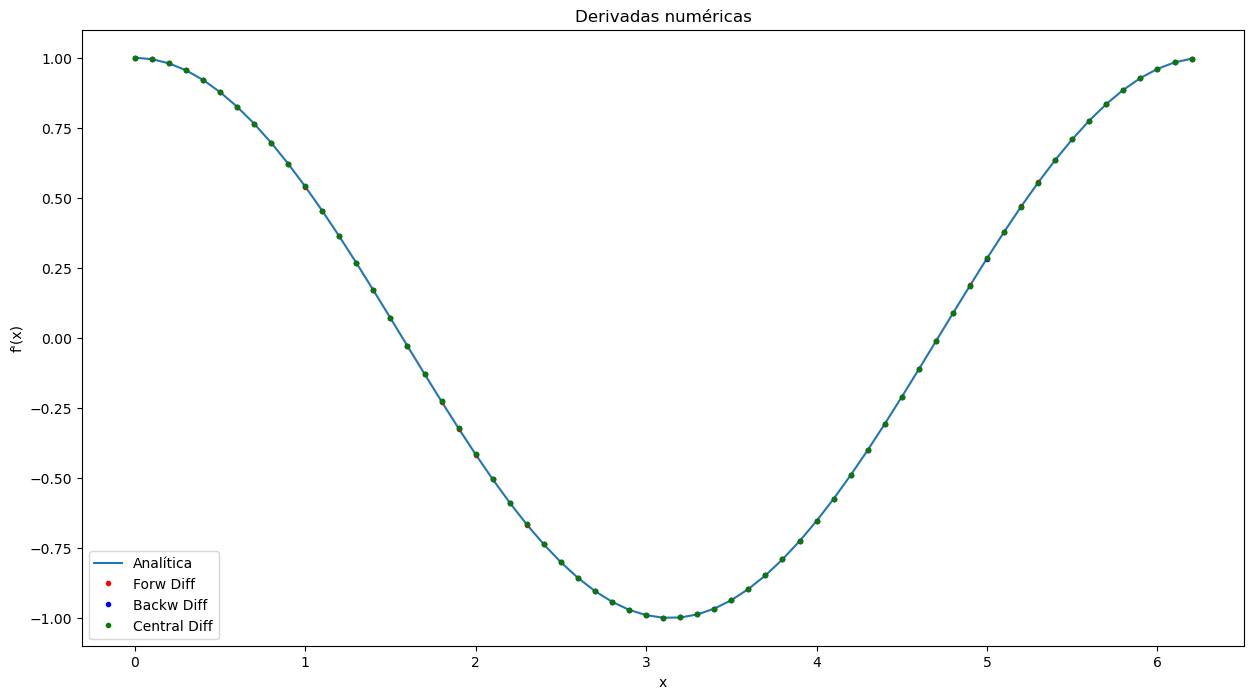

In [3]:
#Practiquemos con la función seno
h = 0.001
xs = np.arange(0,2*np.pi,0.1)
#Calculamos la derivada de la función seno
derivadaAnalitica = [np.cos(x) for x in xs]
derivadaAdelante = [dFor(np.sin,a,h) for a in xs]
derivadaAtras = [dBack(np.sin,a,h) for a in xs]
derivadaCentrada = [dCen(np.sin,a,h) for a in xs]

plt.figure(figsize=(15,8))
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Derivadas numéricas")
plt.plot(xs,derivadaAnalitica,label="Analítica")
plt.plot(xs,derivadaAdelante,'r.',label="Forw Diff")
plt.plot(xs,derivadaAtras,'b.',label="Backw Diff")
plt.plot(xs,derivadaCentrada,'g.',label="Central Diff")
plt.legend()

## Preliminares al cálculo del campo eléctrico

Sabemos que el campo eléctrico de una carga puntual esta dada por
$$
E = k\frac{q}{r^2}
$$

Donde $r^2$ es el cuadrado de la distancia a una carga virtual. El potencial por otro lado es

$$
\phi = k\frac{q}{r}
$$

Para un sistema de $N$ cargas puntuales podemos aplicar el principio de superposición de tal manera que el potencial neto del conjunto de cargas es

$$
\Phi=\sum_i^N \phi_i
$$

Para el caso particular del dipolo eléctrico que tenemos dos cargas $(+)$ y $(-)$, el potencial neto es

$$
\Phi = k\cdot\left(\frac{q_1}{r_1}-\frac{q_2}{r_2}\right)
$$

donde consideramos que $q_2$ tiene carga negatica. En este caso $r_1$ y $r_2$ son las distancias a lugares del espacio que queramos determinar.


### Analizando la implementación

El problema nos habla de dos cargas de un dipolo que estan separadas 10 cm una de la otra y nos piden encontrar potencial eléctrico y campo eléctrico para una malla cuadrada de 1m con separación de 1cm entre cada nodo de la malla.

Antes de comenzar con la implementación introduzcamos el concepto de *pre locación*. Nosotros cuando queremos resolver un problema que involucra matrices (o arreglos de dos dimensiones), podemos *pre locar* el arreglo para ir metiendo el resultado de cada iteración en cada espacio de la matriz/arreglo. Esto es más conveniente que utilizar el método `append()` por términos de lógica e implementación. La pre locación se realiza de la siguiente manera:

```Python
#Pre locamos el arreglo solución 
sol = np.zeros([N,N])
sol1 = np.zeros_like(sol)
```
Generamos una matriz de $N\times N$ donde $N$ es el tamaño de la malla o cuadrícula, nota que podemos generar la misma matriz referenciando a otra que sea de tamaño $N\times N$ (o del tamaño que sea, el chiste es que la crea semejante). En este caso el argumento `sol` es una matriz de ceros pero bien podría ser una matriz de lo que sea de tal forma que `sol1` es semejante a `sol` solo que con entradas cero.

Esta visión es importante porque podemos iterar de manera conveniente sobre esta matriz:

```Python
for i in range(N):
    for j in range(N):
        sol[i,j] = Cualquier_operación #por ejemplo la del potencial del dipolo
```
Cada operación que vayamos cuadrando en la entrada de la matriz `sol[i,j]` se va a guardar en esa entrada y va a recorrer todas las entradas de la matriz de tal modo que al final la solución `sol` tendrá lo que nosotros nos hayamos propuesto.


### Introducción a métodos y formas de graficas interesantes.

Una vez que tengamos nuestra matriz/arreglo solución falta graficarlo, para ello tenemos varias alternativas y todas las veremos a continuación. La primera y mas sencilla de todas es el método de `matplotlib.pyplot` (`plt` pa los cuates): `plt.imshow()`. Este método crea mapas de calor con base en  las entradas de la matriz, simplemente basta con hacer

```Python
plt.imshow(sol,cmap='hot',extent=[0, 1, 0, 1])
plt.colorbar(label='Potencial (Φ)')
```
Esto te dará un resultado visual de lo que sucedió con tu matriz solución. Te recomiendo investigar esquemas de `cmap` que son los colores que tiene el mapa. Siendo un poco más sofisticados podemos emplear los métodos `plt.contour()`, `plt.contourf()`, `plt.quiver()` y `plt.streamplot()`. Pero para poder generarlos necesitan como argumentos una *cuadrícula*. Las cuadrículas para estas funciones son como el dominio en donde se van a evaluar las funciones que queramos. En ese dominio se van a generar los campos vectoriales o las curvas de nivel de cualquier función de $f:\mathbb{R^2}\to\mathbb{R}^2$ o $f:\mathbb{R}^2\to\mathbb{R}$ *continuas* que queramos.

Si tenemos una función $f:\mathbb{R}^2\to\mathbb{R}^2$ para evaluar, escogemos un dominio que es la cuadrícula que se genera con `np.meshgrid(xs,ys)`. Esta funcion genera dos arreglos (matrices) de $N\times N$, uno para evaluar las funciones en $x$ y otras para evaluar las funciones en $y$ y así poder graficar tu campo vectorial. El método toma por argumentos dos arreglos de 1 dimensión, mismos que son el dominio para $x$ y para $y$

```Python
#Arreglos de una dimensión en el intervalo de [0,1] partido en 100 cachitos
xs = np.linspace(0,1,100) 
ys = np.linspace(0,1,100) 
#Estos son las matrices del dominio para x y para y
X,Y = np.meshgrid(xs,ys)
```
En este caso `X` tiene las coordenadas $x$ en `xs` repetidas por cada valor de $y$ y `Y` tiene las coordenadas de $y$ en `ys` repetidas por cada valor de $x$. De esta forma el elemento (lo siguiente es una tupla) `(X[i,j],Y[i,j])` representa una coordenada en la cuadrícula en la que vamos a poder evaluar funciones. Al final de este breviario vemos esto.

Es indispensable generar esta cuadrícula para poder aplicar los gráficos dados por: `plt.contour()`, `plt.contourf()`, `plt.quiver()` y `plt.streamplot()`, ya que toman como argumento
```Python
#Este ejemplo aplica igual para el resto
xs = np.linspace(0,1,100) 
ys = np.linspace(0,1,100) 
X,Y = np.meshgrid(xs,ys)
solx,soly = AlgunaFuncion() #Es el resultado que esperamos ver
plt.streamplot(X,Y,solx,soly)
```
En este caso se toman dos matrices como dominio y dos matrices como soluciones (funciones evaluadas). ¿Antes de seguir adelante que son estas funciones? `plt.quiver()` y `plt.streamplot()` se usan para ver campos vectoriales, ambos generan flechas mostrando un flujo solo que de diferente forma, el primero lo hace para cada punto de la cuadrícula y el segundo considera la cuadrícula pero grafica flujos más continuos. Para el caso de `plt.contour()`, `plt.contourf()` son gráficas de curvas de nivel solo que el primero solo muestra líneas y el segundo muestra superficies completas (por lo tanto admiten funciones $f:\mathbb{R}^2\to\mathbb{R}$).

Para el caso de `plt.quiver()` y `plt.streamplot()` es posible aplicar directamente las funciones sobre las matrices `X` y `Y` por ejemplo

```Python
xs = np.linspace(0,1,100) 
ys = np.linspace(0,1,100) 
X,Y = np.meshgrid(xs,ys)
solx = X + 2Y
soly = 3x - Y
plt.quiver(X,Y,solx,soly)
```
Estos arreglos `solx` y `soly` ya guardan en si mismo la solución del campo vectorial dada por sus ecuaciones. La forma en la que esto funciona es que realiza la operación entrada entrada (me parece que es así) y la guarda en el nuevo arreglo (objeto) generado. 

Por último, para poder emplear la cuadrícula de una forma más personalizada podemos hacer lo siguiente.
```Python
def Potencial(x,y)
    return ...
def Gradiente(x,y)
    return ...
N = 50
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y= np.meshgrid(x,y)
potencial = np.zeros_like(X) #Matriz de ceros de 50 x 50 en este caso.
Ex = np.zeros_like(X)
Ey = np.zeros_like(X)
for i in range(N):
    for j in range(N):
        #definimos las coordenadas
        x,y = X[i,j],Y[i,j]
        potencial[i,j] = Potencial(x,y)
        Ex[i,j],Ey[i,j] = Gradiente(x,y)
```
En este caso las funciones definidas pueden ser cualuier cosa que tu quieras, es a gusto del programador pero siempre y cuando cumpla con la lógica (sino simplemente no compilará cx). Y sea lo que hagan estas funciones que dependen de $x$ y $y$ se va a guardar en la entrada `[i,j]` de cada arreglo solución de propuesto. Ya solo lo que queda es graficar.
```Python
plt.contourf(X,Y,potencial)
plt.quiver(X,Y,Ex,Ey)

Regresando a la implementación del problema. Para poder resolverlo necesitamos fijar dos puntos en donde se van a encontrar nuestras cargas, si definimos que nuestro dominio es `np.linspace(0,1,100)` considerando el intervalo $[0,1]$ como 1m y las 100 subdivisiones como cada $cm$, conviene definir al centro cerca del $(0.5,0.5)$

```Python
x1,y1 = .5,.55 #para la carga positiva por ejemplo.
```
Esto ya es a elección personal. Ahora notemos que los elementos del linespace son nuestro dominio tanto en $x$ como en $y$ (para cada arreglo que se defina), lo único que resta es definir las funciones necesarias para calcular el potencial y el gradiente del potencial. Para ello recomiendo generar una función `f(x,y)` que admita valores cartesianos y devuelva el potencial en términos de $\frac{1}{r_i}$. En su camino se encontrarán con un detalle de división por cero (vean como resolverlo). Por último, conviene reciclar `f(x,y)` si es que generan un gradiente como las derivadas numéricas que puse arriba, recordando que el campo eléctrico es $E=-\nabla \phi$

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import importlib 
import main_derivatives
from tqdm import tqdm

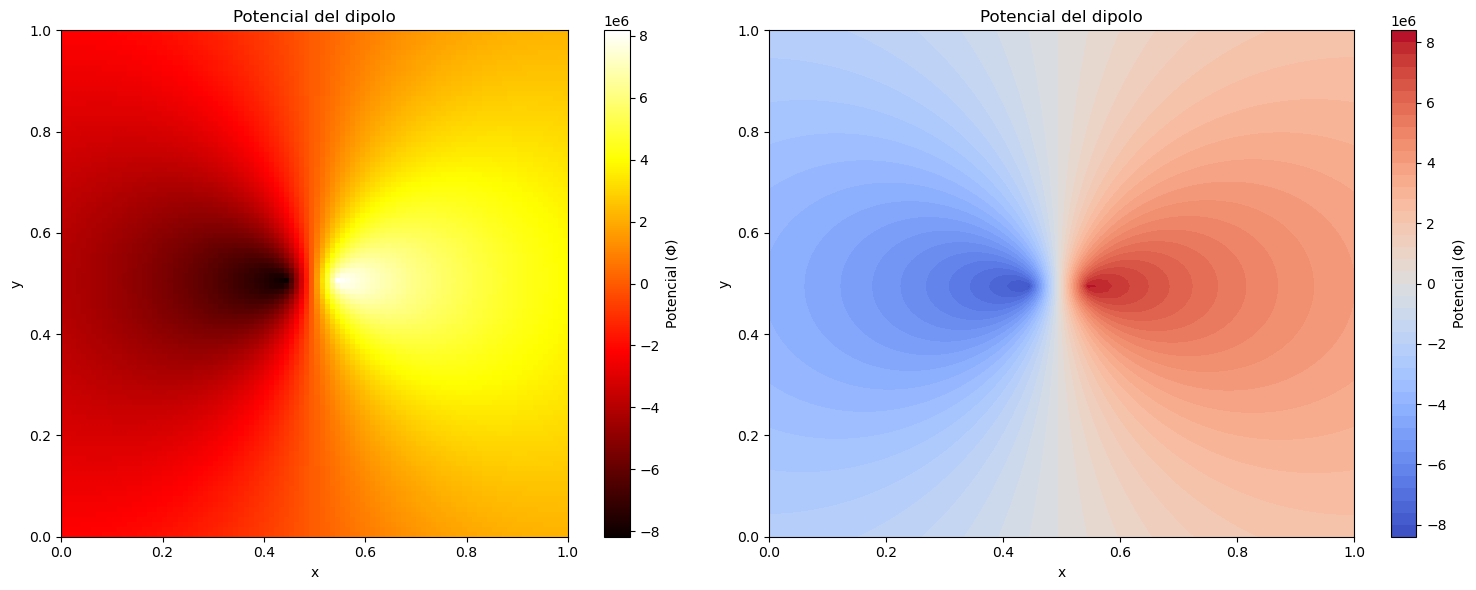

In [7]:
#Ejercicio 1a) Potencial del dipolo eléctrico
importlib.reload(main_derivatives)
#Entre más grande sea ϵ se elimina el problema de la división por cero y se mejora el gráfico aunque se ve impactado en la escala.
ϵ = 1e2
Φ = main_derivatives.potencialDipolo(ϵ)
    
#Tiene el problema de que ya no considera la parte negativa del potencial
#Φ_log = np.log(np.abs(Φ) + 1e-2)

plt.figure(figsize=(16, 6))

plt.subplot(1,2,1)
plt.imshow(Φ, cmap='hot', extent=[0, 1, 0, 1])
plt.colorbar(label='Potencial (Φ)')
plt.title('Potencial del dipolo')
plt.xlabel('x')
plt.ylabel('y')        

#Configuración del gráfico de contorno
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

plt.subplot(1,2,2)
contour = plt.contourf(X, Y, Φ, levels=50, cmap='coolwarm')  #Se ajusta `levels` según la resolución deseada
plt.colorbar(contour, label='Potencial (Φ)')
plt.title('Potencial del dipolo')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()  # Ajusta el espacio entre subgráficos
plt.show()

Text(0.5, 1.0, 'quiver')

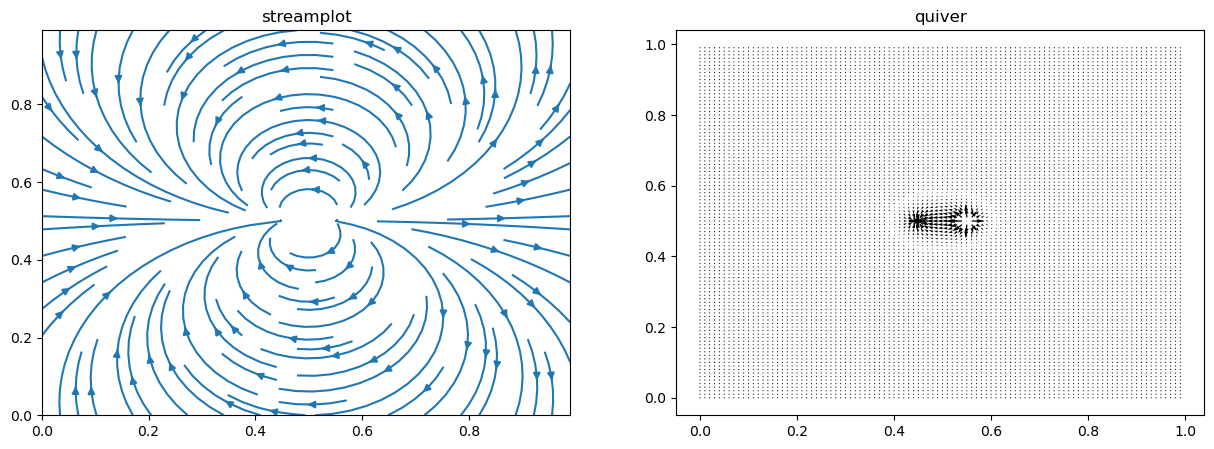

In [9]:
#Utilizando quiver y streamplot
X,Y = np.meshgrid( np.arange(0,1,0.01), np.arange(0,1,0.01) )
epsilon = 1e-9
Ex = (X - 0.55)/((X-0.55)**2 + (Y-0.5)**2 + epsilon) - (X - 0.45)/((X-0.45)**2 + (Y-0.5)**2 + epsilon)
Ey = (Y-0.5)/((X-0.55)**2 + (Y-0.5)**2 + epsilon) - (Y-0.5)/((X-0.45)**2 + (Y-0.5)**2 + epsilon) 

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

ax1.streamplot(X,Y,Ex,Ey)
ax1.set_title('streamplot')

ax2.quiver(X,Y,Ex,Ey,scale=4000)
ax2.set_title('quiver')

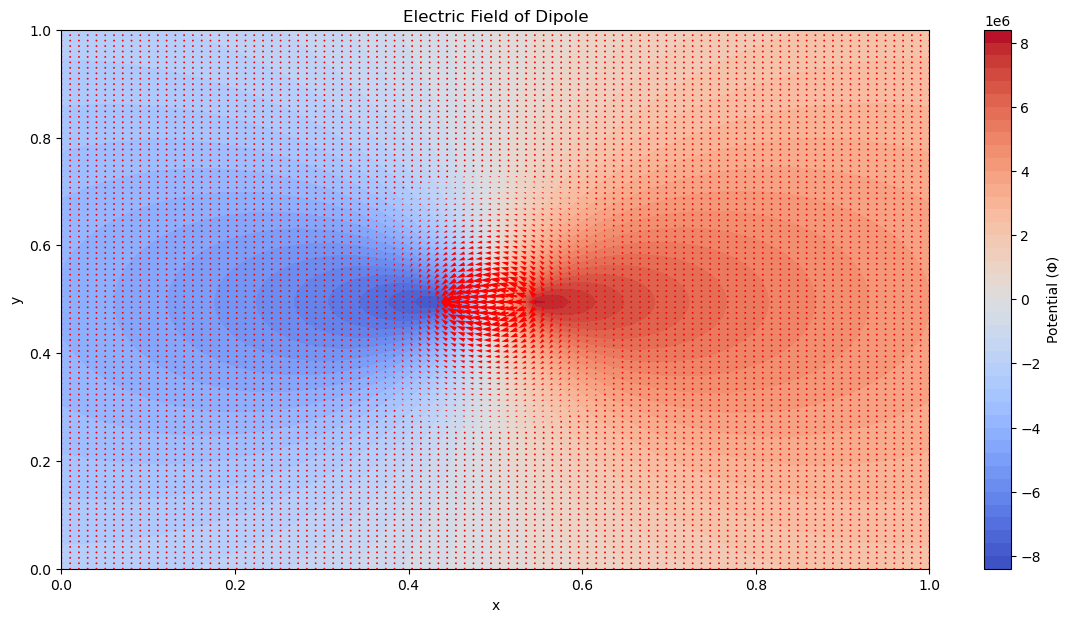

In [10]:
importlib.reload(main_derivatives)
Ey, Ex = np.gradient(-Φ)  # Derivadas parciales de Φ con respecto de x y y (con signo negativo)

#Cuadrícula
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

#Campo vectorial junto con sus curvas de nivel
plt.figure(figsize=(14, 7))
plt.contourf(X, Y, Φ, levels=50, cmap='coolwarm')
plt.colorbar(label='Potential (Φ)')
plt.quiver(X, Y, Ex, Ey, color='red',scale=100000000)
plt.title('Electric Field of Dipole')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Text(0, 0.5, 'y')

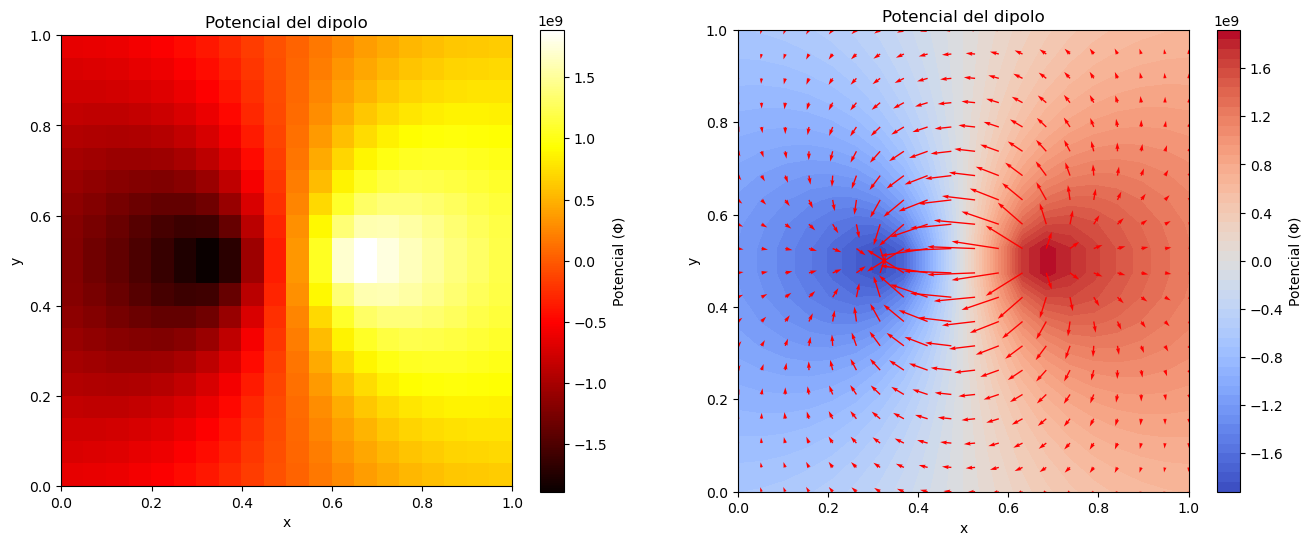

In [12]:
importlib.reload(main_derivatives)
N=20
Φ,Ex,Ey = main_derivatives.potencialycampoDip(N)      

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.imshow(Φ, cmap='hot', extent=[0, 1, 0, 1])
plt.colorbar(label='Potencial (Φ)')
plt.title('Potencial del dipolo')
plt.xlabel('x')
plt.ylabel('y')
    

x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X,Y= np.meshgrid(x,y)

plt.subplot(1,2,2)
contour = plt.contourf(X, Y, Φ, levels=50, cmap='coolwarm')  # Ajusta `levels` según la resolución deseada
plt.colorbar(contour, label='Potencial (Φ)')
plt.quiver(X, Y, -Ex, -Ey, color='red')
plt.title('Potencial del dipolo')
plt.xlabel('x')
plt.ylabel('y')

## Distribución de carga continua: Superficie

En este caso bien sabemos que la carga se distribuye de manera continua por toda una superficie bien definida, en este caso una placa de $L\times L$. La distribución de la carga continua puede tener muchos aspectos pero nuestro ejercicio la define de la siguiente manera

$$
\sigma(x,y) = q_0\sin\left(\frac{2\pi x}{L}\right)\sin\left(\frac{2\pi y}{L}\right)
$$

En el caso discreto realizabamos una suma de los potenciales de cada partícula y de esa manera determinabamos el potencial del sistema (aplicando el principio de superposición). Pero para el caso de la carga continua debemos de considerar el potencial que se ejerce en un cachito de superficie, es decir:

$$
dq=\sigma(x,y)\, dS
$$

Determinar el potencial es ejercer una suma sobre todos los $dq$ de tal manera que aplicamos la integral de superficie en donde $dS=dudv$ (por ser una placa de dos dimensiones).

$$
V(x,y,z)=\frac{1}{4\pi\epsilon_0}\iint_\Omega \frac{dq}{r}\, dS =\frac{1}{4\pi\epsilon_0}\iint_{\Omega} \frac{\sigma(u,v)}{\sqrt{(x-u)^2+(y-v)^2 + z^2}}\ du\, dv
$$


En este caso $\Omega$ es la placa de $L\times L$ y se considera el potencial en el punto $(x,y,z)$. Por tanto el potencial se calcula en términos de la distancia de dicho punto a cualquier punto de la superficie $(u,v,0)$. Una vez contando con el potencial, determinamos su campo eléctrico realizando nuevamente el menos gradiente del potencial

$$
E=-\nabla V
$$

In [ ]:
# Tamaño de la malla de cálculo de potencial
importlib.reload(main)

px_inicio,px_fin = 45 , 55
py_inicio,py_fin = 45 , 55
L = 30#cm
Φ = np.zeros((L, L))
ϵ = 1e3
# Parámetros de la placa
placa = 10
us = np.linspace(px_inicio, px_fin, placa)
vs = np.linspace(py_inicio, py_fin, placa)
dx = (px_fin - px_inicio) / 1
dy = (py_fin - py_inicio) / 1

#Dominio de la malla
xs = np.linspace(0, 100, L)
ys = np.linspace(0, 100, L)

# Calcular el potencial en cada punto de la malla usando sumas de Riemann
for i, x in tqdm(enumerate(xs)):
    for j, y in enumerate(ys):
        potencial = 0
        for u in us:
            for v in vs:
                r = np.sqrt((x - u)**2 + (y - v)**2) + ϵ
                potencial += main.sigma(us.tolist().index(u), vs.tolist().index(v)) / r
        Φ[i, j] = potencial * dx * dy

```Python
def sigma(i,j):
    xs = np.linspace(px_inicio,px_fin,placa)
    ys = np.linspace(py_inicio,py_fin,placa)
    I , J = np.meshgrid(xs,ys,indexing='ij')
    σ = q0 * np.sin(2 * np.pi * I / placa) * \
               np.sin(2 * np.pi * J / placa)
    return σ[i,j]
```

In [ ]:
Ex,Ey=np.gradient(-Φ)
plt.figure(figsize=(16, 6))

# Primer subgráfico: imshow
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.imshow(Φ, extent=(0, 100, 0, 100), origin='lower', cmap='hot')
plt.colorbar(label="Potencial (Φ)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Potencial usando Sumas de Riemann")

# Segundo subgráfico: contourf
xs = np.linspace(0, 100, L)
ys = np.linspace(0, 100, L)
X, Y = np.meshgrid(xs, ys)

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
contour = plt.contourf(X, Y, Φ, levels=50, cmap='coolwarm')  # Se ajusta `levels` según la resolución deseada
plt.colorbar(contour, label='Potencial (Φ)')
plt.quiver(X,Y,Ex,Ey,color='red')
plt.title('Potencial del Dipolo')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar la figura combinada
plt.tight_layout()  # Ajusta el espacio entre subgráficos
plt.show()

## En lo que carga: Sumas de Riemann para integrar.

Bien sabemos que queremos calcular el potencial elétrico de la placa con la densidad de carga ya antes establecida. La integral de superficie la podemos aproximar a una suma de Riemann dividiendo el espacio de interés ($\Omega$) en pequeñas áreas de tal manera que la integral se aproxima a
$$
V(x,y)\approx \frac{1}{4\pi\epsilon_0}\sum_{u,v\in\Omega}\frac{\sigma(u,v)}{r}\ du'\, dv'
$$
Donde en este caso los $du'$ y $dv'$ son las pequeñas porciones de la placa. Multiplicar la suma ponderada del potencial por estas cantidades es equivalente a agregar el área de cada pequeño rectángulo de integración, es decir, agregar de cada contribución del potencial de manera discreta. Entre más finos sean las áreas de integración, mejor será su aproximación a la integral de superficie. 

Esta visión de la suma de Riemann no es la clásica conocida en donde se subdivide el intervalo en una partición y se suma el área de cada rectangulito. En este caso directamente evaluamos la densidad de carga y la convertimos en una pequeña contribución al multiplicarla por $du'$ y $dv'$, de forma que al sumar todas las contribuciones obtengamos la aproximación del potencial.

Text(0, 0.5, 'y')

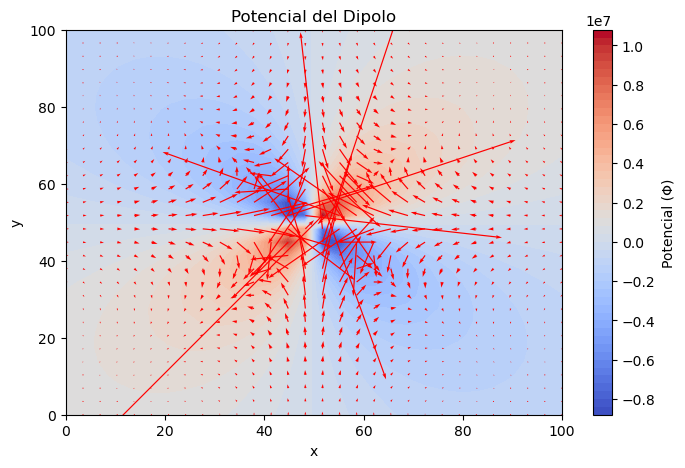

In [3]:
importlib.reload(main)

L = 30
Φ1,Ex1,Ey1 = main.potencialycampoσ(L)

xs = np.linspace(0, 100, L)
ys = np.linspace(0, 100, L)
X, Y = np.meshgrid(xs, ys)

plt.figure(figsize=(8,5)) # 1 fila, 2 columnas, segundo gráfico
contour = plt.contourf(X, Y, Φ1, levels=50, cmap='coolwarm')  # Se ajusta `levels` según la resolución deseada
plt.colorbar(contour, label='Potencial (Φ)')
plt.quiver(X, Y, -Ex1, -Ey1, color='red')#,scale = 10000000000000)
plt.title('Potencial del Dipolo')
plt.xlabel('x')
plt.ylabel('y')